<h1>Supervised Learning For Students Score Prediction</h1>

<h3>Done By
    Ameer Mohamed R</h3>

<h4>Import the Necessary Libraries</h4>

In [1]:
import pandas as pd # for Data frame manipulation
import numpy as np # for array Ops

In [2]:
link = 'http://bit.ly/w-data' # store the URL in the object called link

In [3]:
df = pd.read_csv(link) # read the data from from source

In [4]:
df.head(10)  #read the first 10 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.ndim # check for the dimensions

2

In [6]:
df.shape # check the shape

(25, 2)

In [7]:
df.size # check the size

50

In [8]:
df.dtypes # check variables data types

Hours     float64
Scores      int64
dtype: object

In [9]:
df.describe() # descriptive stats for numerical data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Import the Required Libraries for Data Visualization Opearions**

In [10]:
import matplotlib.pyplot as plt  # best libs for data visualization
import seaborn as sns

**Regression Plot for variable Association check**

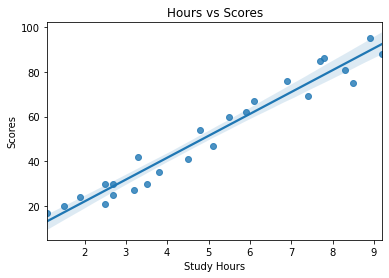

In [145]:
sns.regplot('Hours','Scores',df)
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

**Extracting Input vales from dataframes and convert them into 2D-numpy arrays**

In [11]:
X = df.iloc[:, :-1].values  

In [12]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y = df.iloc[:, 1].values  

In [14]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**Split the data arrays for resampling Process**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # import the model class for modelling

**Split the data into training and testing**

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 3)

**Train the model on the training set data**

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Test the model on testing set data**

In [20]:
line = model.coef_*X+model.intercept_

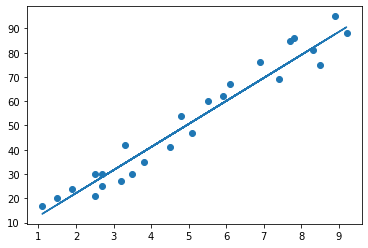

In [21]:
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([61.07240199, 21.18113131, 45.87572744, 68.67073926, 87.66658244])

In [24]:
# Comparing Actual vs Predicted and covert them as a dataframe
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,67,61.072402
1,24,21.181131
2,41,45.875727
3,76,68.670739
4,95,87.666582


**Checck the model performance for newly input data**

In [25]:
hours = 9.25
own_pred = model.predict([[hours]])
own_pred

array([90.990855])

**Accuracy Metrics for Model**

In [158]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.656974488548374
